# Задание 

In [28]:
import matplotlib.pyplot as plt
import numpy as np


## Task 1
1. Установи библиотеку sympy.
2. Используя ее функции, напиши свою функцию, которая на вход примет математическую функцию $ y=f(x)$ вида $x^2 - x + 21$, и вернёт производную: $2𝑥−1$.

In [8]:
!pip install sympy
from sympy import Symbol, diff

def derivative(f):
    x = Symbol('x')
    df = diff(f, x)
    return df

f = "x**2 - x + 21"
df = derivative(f)
print(df) 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2*x - 1


## Task 2
В этот раз напиши свою функцию, которая на вход примет математическую функцию $p = f(x, y)$, зависящую от двух переменных вида $ (x-y)^2 $, а также ту переменную, по которой нужно посчитать частную производную. Функция должна вернуть частную производную этой переменной: $2𝑥−2𝑦$.

In [30]:
from sympy import diff
from sympy import *

def partial_derivative(p, var):
    x, y = symbols('x y')
    expr = sympify(p)
    if var == 'x':
        return diff(expr, x)
    elif var == 'y':
        return diff(expr, y)
    else:
        return "Invalid variable"
p = '(x - y)**2'
var = 'x'
res = partial_derivative(p, var)
print(res)

2*x - 2*y


## Task 3

1. Тебе надо написать математическую функцию. Представь, что у тебя есть y_true и есть y_pred (предсказанное). Тебе надо посчитать квадрат отклонения одного от другого. Причём предсказанное значение получается при помощи функции линейной регрессии: y = wx +b. Дополнительно поделим всё это на n.
2. Нужно написать функцию Python, которая примет на вход эту функцию и ту переменную, по которой нам надо посчитать частные производные. Нас будут интересовать w и b. Именно их наилучшие значения мы и будем в дальнейшем искать. Функция должна вернуть производные сразу по обеим этим переменным.

In [35]:

def count_1():
  y_true, y_pred, w, x, b, n = symbols("y_true, y_pred, w, x, b, n")
  y_pred = w * x + b
  return (y_true - y_pred) ** 2 / n 
  
def count_2(func, var1, var2):
  return diff(func, var1), diff(func, var2)


w, b = symbols("w, b")
count_2(count_1(), w, b)




(-2*x*(-b - w*x + y_true)/n, (2*b + 2*w*x - 2*y_true)/n)

## Task 4
1. В этот раз вам надо написать класс `Gradient()`, который будет состоять из нескольких методов. Объект при инициализации получает два вектора: `X`, `Y`. Далее методы обращаются к ним уже внутри класса.
    - `predict`: на вход она получает `w`, `b`, на выход она выдаёт прогнозные значения `Y_pred`;
    - `mse`: на вход она получает `Y_pred`, на выход выдает посчитанное MSE;
    - `update`: на вход она получает `Y_pred`, `w`, `b`; на выход выдаёт новые значения `w`, `b`, которые обновились благодаря посчитанным градиентам.
2. Проверить работу методов, подав на вход класса два вектора `X`, `Y` и начальные параметры `w`, `b` в требуемые методы.

In [42]:
X = np.array(
    [32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787, 55.14218841, 
     52.21179669, 39.29956669, 48.10504169, 52.55001444, 45.41973014, 54.35163488, 
     44.1640495 , 58.16847072, 56.72720806, 48.95588857, 44.68719623, 60.29732685, 
     45.61864377, 38.81681754]
)
Y = np.array(
    [31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513, 78.21151827, 
     79.64197305, 59.17148932, 75.3312423 , 71.30087989, 55.16567715, 82.47884676, 
     62.00892325, 75.39287043, 81.43619216, 60.72360244, 82.89250373, 97.37989686, 
     48.84715332, 56.87721319]
)



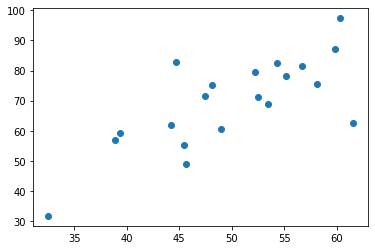

In [37]:
plt.scatter(X, Y);

In [43]:
class Gradient:
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def predict(self, w, b):
        Y_pred = np.dot(self.X, w) + b
        return Y_pred

    def mse(self, Y_pred):
        mse = np.mean((self.Y - Y_pred) ** 2)
        return mse

    def update(self, Y_pred, w, b):
        lr = 0.00001
        dw = np.mean(np.dot((Y_pred - self.Y), self.X))
        db = np.mean(Y_pred - self.Y)
        w = w - lr * dw
        b = b - lr * db
        return w, b

In [64]:
gradient = Gradient(X, Y)

# Проверим метод predict
Y_pred = gradient.predict(0.5, 1)
print("Y_pred:", Y_pred)

# Проверим метод mse
mse = gradient.mse(Y_pred)
print("MSE:", mse)

# Проверим метод update
w_new, b_new = gradient.update(Y_pred, 0.5, 1)
print("New w:", w_new)
print("New b:", b_new)

Y_pred: [17.25117263 27.71340201 31.76517902 24.73781982 30.90660393 28.57109421
 27.10589834 20.64978334 25.05252085 27.27500722 23.70986507 28.17581744
 23.08202475 30.08423536 29.36360403 25.47794428 23.34359811 31.14866342
 23.80932188 20.40840877]
MSE: 2036.5674930726975
New w: 0.9450307402717477
New b: 1.0004345262795524


## Task 5
Улучши код таким образом, чтобы появился метод `optimize`. Он должен итеративным образом пройти какое-то количество раз обновление значений `w`, `b`, придя к оптимальному значению. Критерии останова:
 - если было превышено количество заранее заданных итераций `num_iterations`;
 - если новая итерация выдала разницу между текущей ошибкой и ошибкой прошлой итерации значение, меньшее, чем `stopping_threshold`;
 - метод должен вернуть финальные значения `w`, `b`, и `mse`.


In [62]:
class GradientDescent(Gradient):
    
    def __init__(self, X, Y):
        super().__init__(X, Y)
        
    def optimize(self, num_iterations=100, stopping_threshold=0.0001):
        w = 0
        b = 0
        mse_old = 0
        for i in range(num_iterations):
            Y_pred = self.predict(w, b)
            mse = self.mse(Y_pred)
            if i > 0 and mse_old - mse < stopping_threshold:
                break
            mse_old = mse
            w, b = self.update(Y_pred, w, b)
        return w, b, mse

In [63]:
train = GradientDescent(X,Y)
print(train.optimize(10000, 0.0000001))

(1.3904038513516916, 0.0013525504048759868, 98.63584375917914)
